
## 10 Academy: Artificial Intelligence Mastery
### Project: Enhanced Fraud Detection for E-Commerce and Banking Transactions
#### Data Analysis and Preprocessing,Feature Engineering and Data Transformation
##### Ethel Cherotaw

In [1]:
import sys
import pandas as pd
scripts_dir = r'E:\DS+ML\AIM3\WEEK.12\Enhanced-Fraud-Detection-for-E-Commerce-and-Banking-Transactions\scripts'
src_dir = r'E:\DS+ML\AIM3\WEEK.12\Enhanced-Fraud-Detection-for-E-Commerce-and-Banking-Transactions\src'
# Load the datasets
fraud_df = pd.read_csv(r"E:\DS+ML\AIM3\WEEK.12\Data\Fraud_Data.csv")
credit_df = pd.read_csv(r"E:\DS+ML\AIM3\WEEK.12\Data\creditcard.csv")
ip_df = pd.read_csv(r"E:\DS+ML\AIM3\WEEK.12\Data\IpAddress_to_Country.csv")
# output folder 
output_path = r"E:\DS+ML\AIM3\WEEK.12\Data"
output_future_engineered = r"E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_fraud_Data.csv"
# Add directories to the Python path if they are not already included
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [2]:
from data_processor import FraudDataProcessor
from EDA import FraudEDA
from feature_engineering import FraudFeatureEngineer,FeatureCredit

#### 1. Data Analysis and Preprocessing
##### Objective: Ensure data quality, consistency, and readiness for model development.

In [3]:
print("\nFraud Dataset")
fraud_df.head()



Fraud Dataset


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
print("\nCredit Card Dataset")
credit_df.head()


Credit Card Dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("\nIP_Location")
ip_df.head


IP_Location


<bound method NDFrame.head of         lower_bound_ip_address  upper_bound_ip_address    country
0                 1.677722e+07                16777471  Australia
1                 1.677747e+07                16777727      China
2                 1.677773e+07                16778239      China
3                 1.677824e+07                16779263  Australia
4                 1.677926e+07                16781311      China
...                        ...                     ...        ...
138841            3.758092e+09              3758093311  Hong Kong
138842            3.758093e+09              3758094335      India
138843            3.758095e+09              3758095871      China
138844            3.758096e+09              3758096127  Singapore
138845            3.758096e+09              3758096383  Australia

[138846 rows x 3 columns]>

 #### Initialize processor

In [6]:
processor = FraudDataProcessor(fraud_df, credit_df, ip_df)


#### Display Data shape and information 

In [7]:
processor.clean_data_types()
processor.show_data_shapes()
processor.show_data_info()


Fraud Data Shape: (151112, 12)
Credit Card Data Shape: (284807, 32)
IP Data Shape: (138846, 3)

Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           151112 non-null  int64         
 1   signup_time       151112 non-null  datetime64[ns]
 2   purchase_time     151112 non-null  datetime64[ns]
 3   purchase_value    151112 non-null  int64         
 4   device_id         151112 non-null  object        
 5   source            151112 non-null  category      
 6   browser           151112 non-null  category      
 7   sex               151112 non-null  category      
 8   age               151112 non-null  int64         
 9   ip_address        151112 non-null  object        
 10  class             151112 non-null  int64         
 11  time_to_purchase  151112 non-null  float64       
dtype

#### Access cleaned data after type cleaning


In [8]:
processor.fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_purchase
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0,4361461.0


#### Checking Missing Values 

In [9]:
missing_values = processor.check_missing_values()



Missing Values in Fraud Data:
 user_id             0
signup_time         0
purchase_time       0
purchase_value      0
device_id           0
source              0
browser             0
sex                 0
age                 0
ip_address          0
class               0
time_to_purchase    0
dtype: int64

Missing Values in Credit Card Data:
 Time             0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Amount           0
Class            0
scaled_amount    0
dtype: int64

Missing Values in IP Data:
 low

#### Check for duplicates and remove duplicates 

In [10]:
processor.remove_duplicates()
processor.show_data_shapes()


Fraud Data Shape: (151112, 12)
Credit Card Data Shape: (283726, 32)
IP Data Shape: (138846, 3)


#### Validate consistency


In [11]:
processor.validate_data_consistency()

#### Visualization

In [12]:
processor.generate_target_distribution_plot()


In [13]:
processor.save_all_data(
    fraud_path=output_path + "/cleaned_fraud.csv",
    credit_path=output_path + "/cleaned_credit.csv",
    ip_path=output_path + "/cleaned_ip.csv"
)



            Data saved successfully:
            - Fraud: E:\DS+ML\AIM3\WEEK.12\Data/cleaned_fraud.csv
            - Credit: E:\DS+ML\AIM3\WEEK.12\Data/cleaned_credit.csv
            - IP: E:\DS+ML\AIM3\WEEK.12\Data/cleaned_ip.csv
            


In [14]:
cleaned_fraud = pd.read_csv(output_path + "/cleaned_fraud.csv")
cleaned_credit = pd.read_csv(output_path + "/cleaned_credit.csv")
cleaned_ip = pd.read_csv(output_path + "/cleaned_ip.csv")

### 2. Explanatory Data Analysis(EDA) 

#### Initialize processor


In [15]:
eda = FraudEDA(
    fraud_path=output_path + "/cleaned_fraud.csv",
    creditcard_path=output_path + "/cleaned_credit.csv",
    ip_path=output_path + "/cleaned_ip.csv",
    output_path=output_path+"/processed_fraud_data.csv"
)


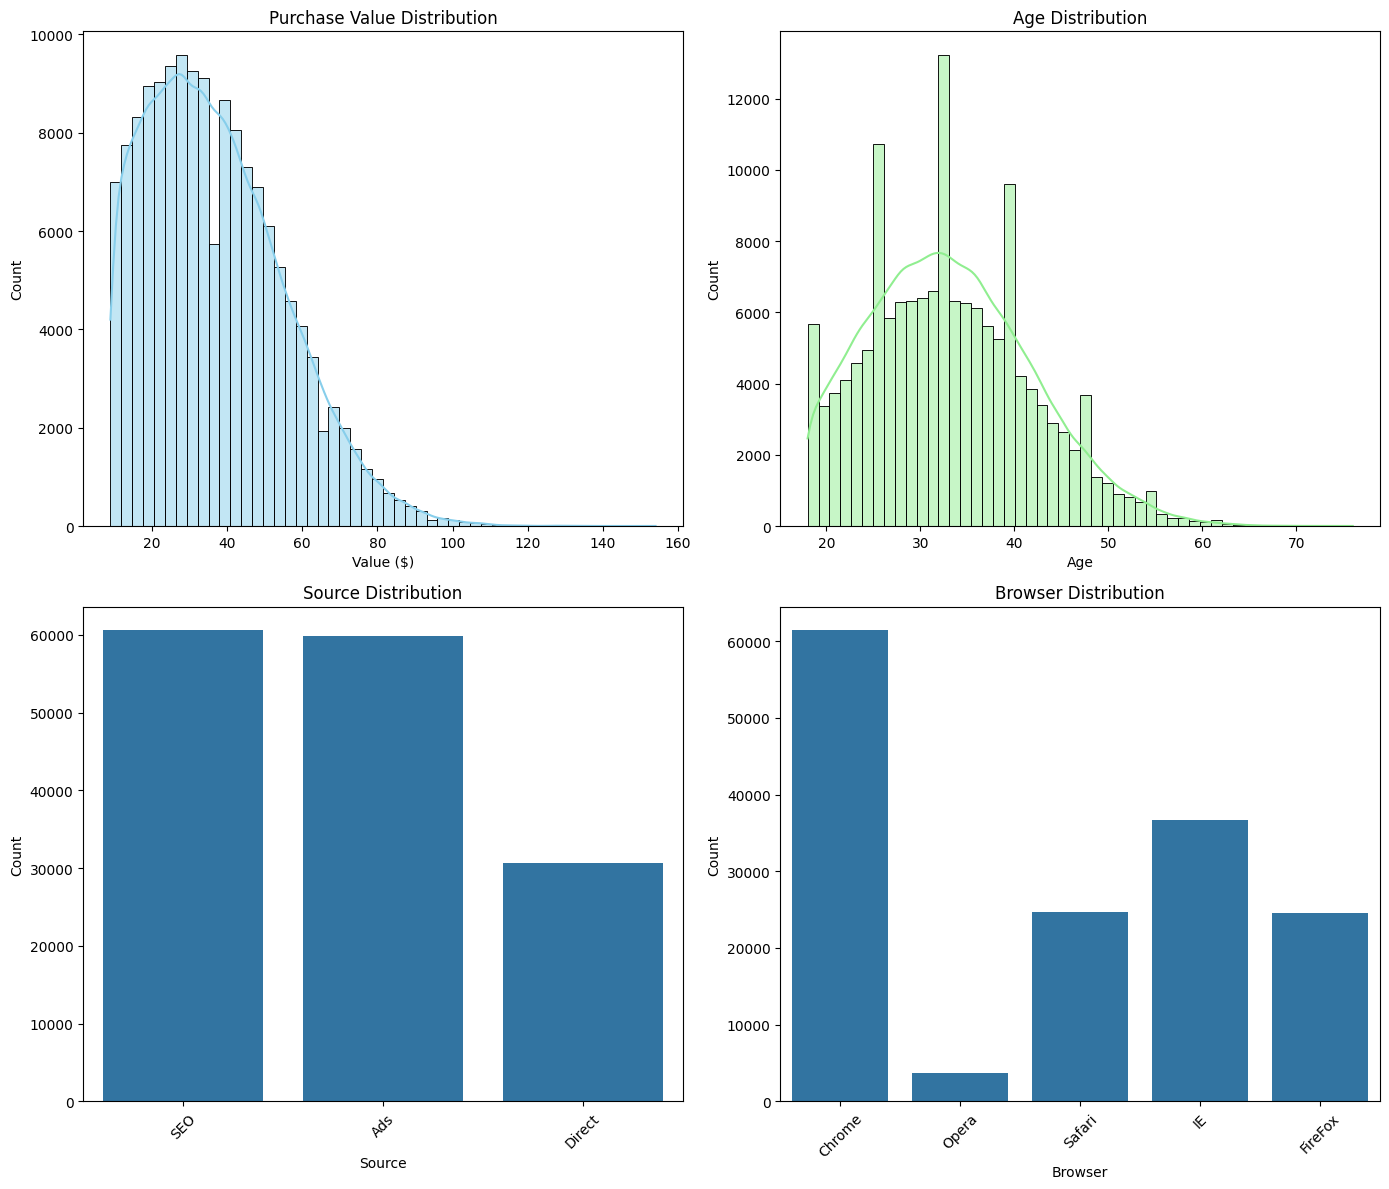

In [16]:
eda.plot_fraud_distributions()    

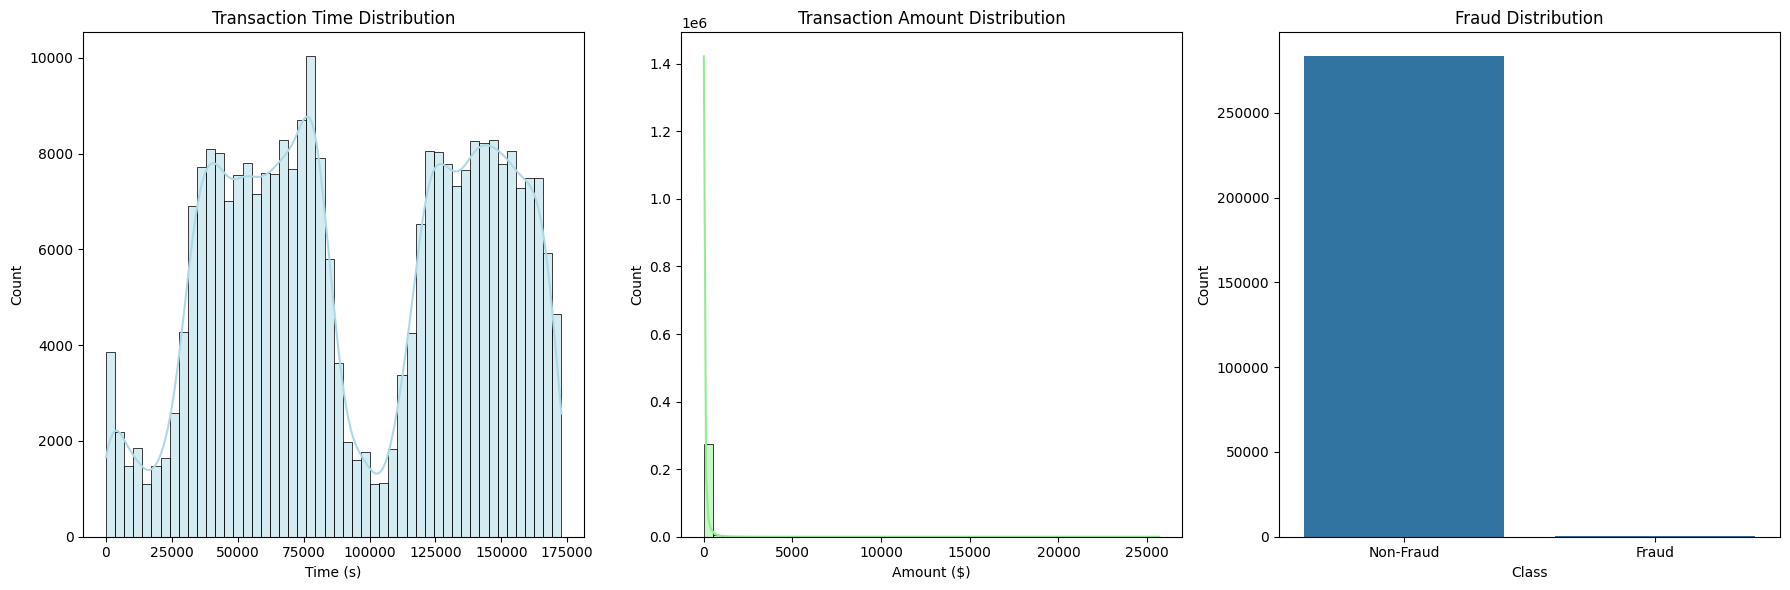

In [17]:
eda.plot_creditcard_distributions()  

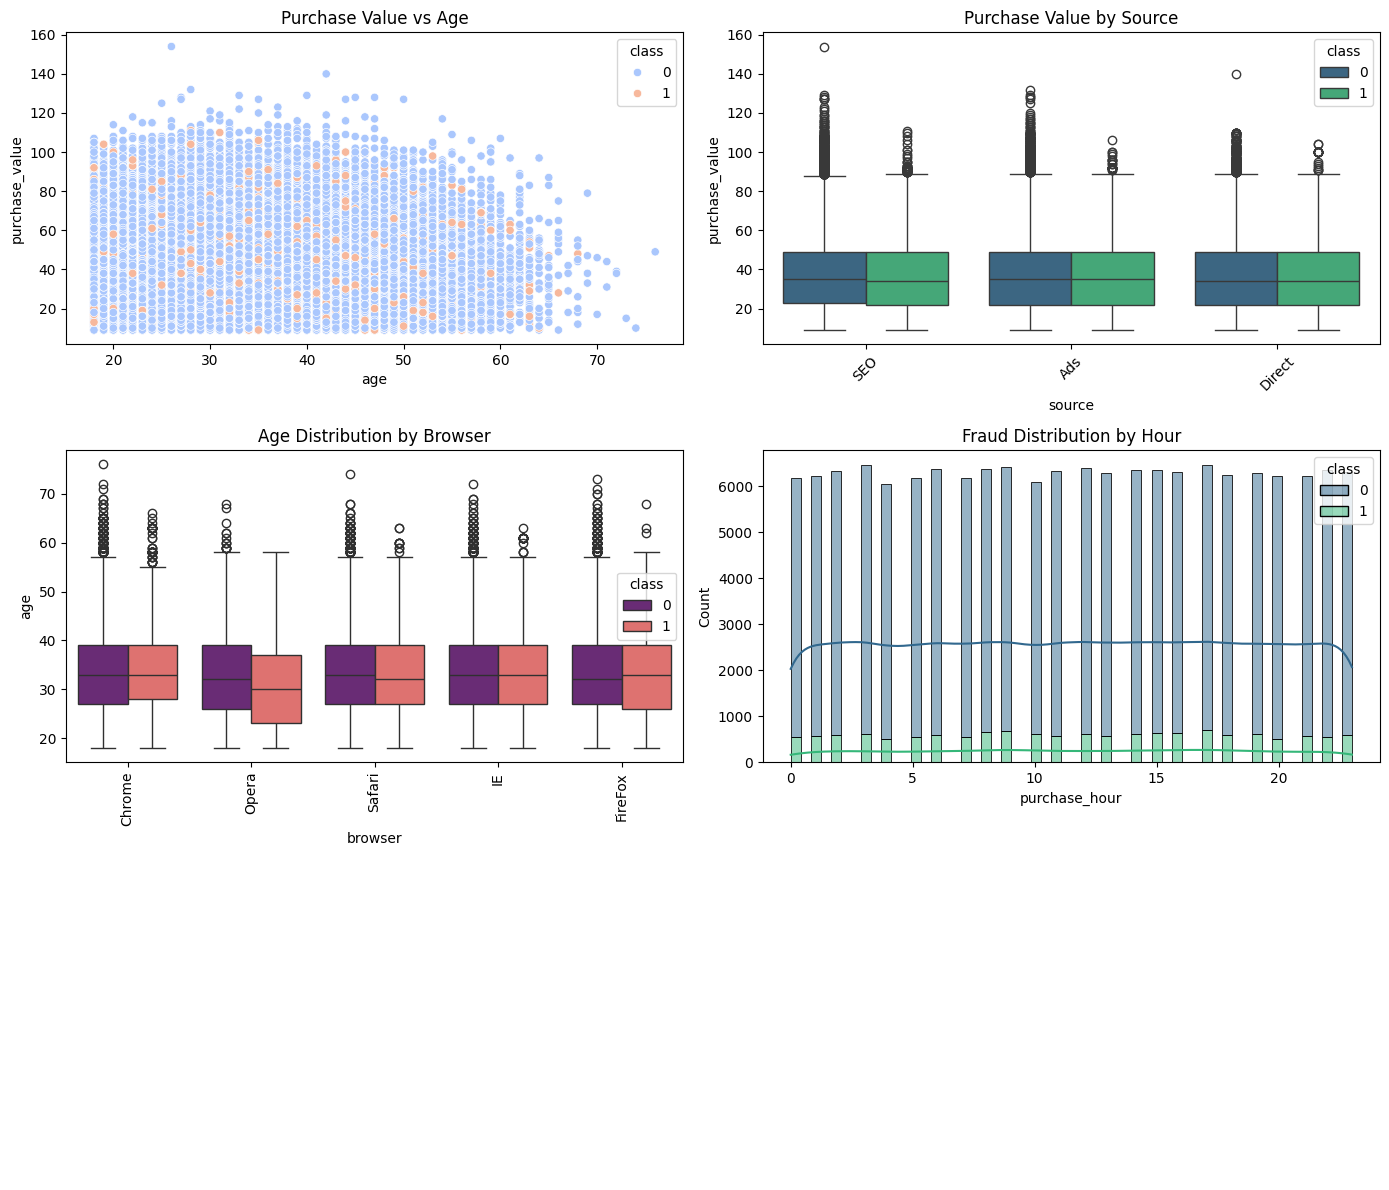

In [18]:
eda.plot_fraud_relationships()        

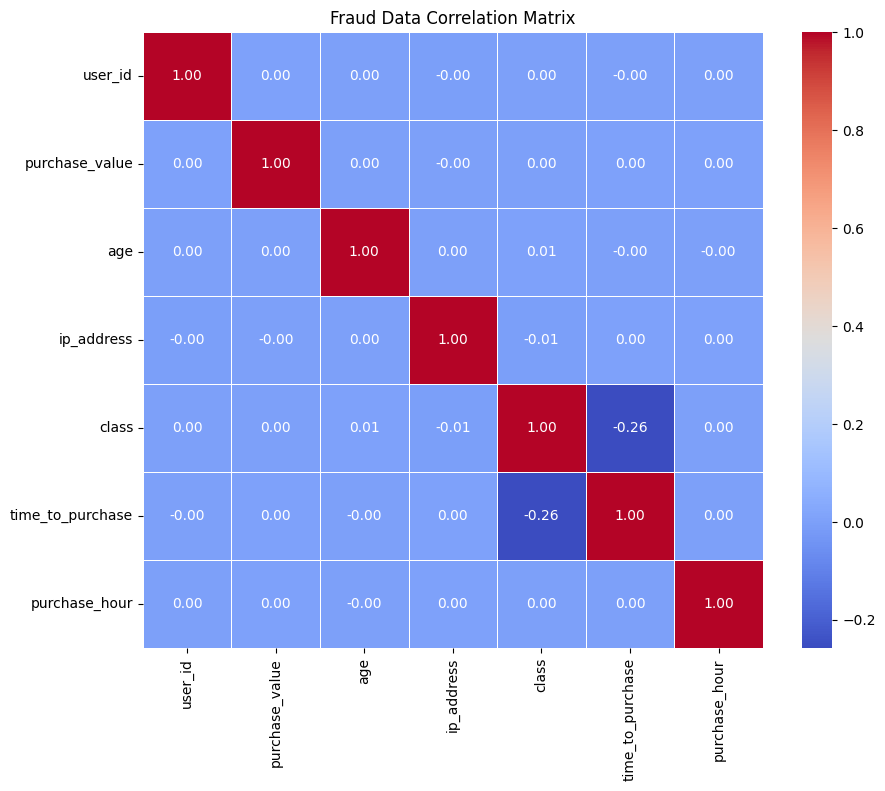

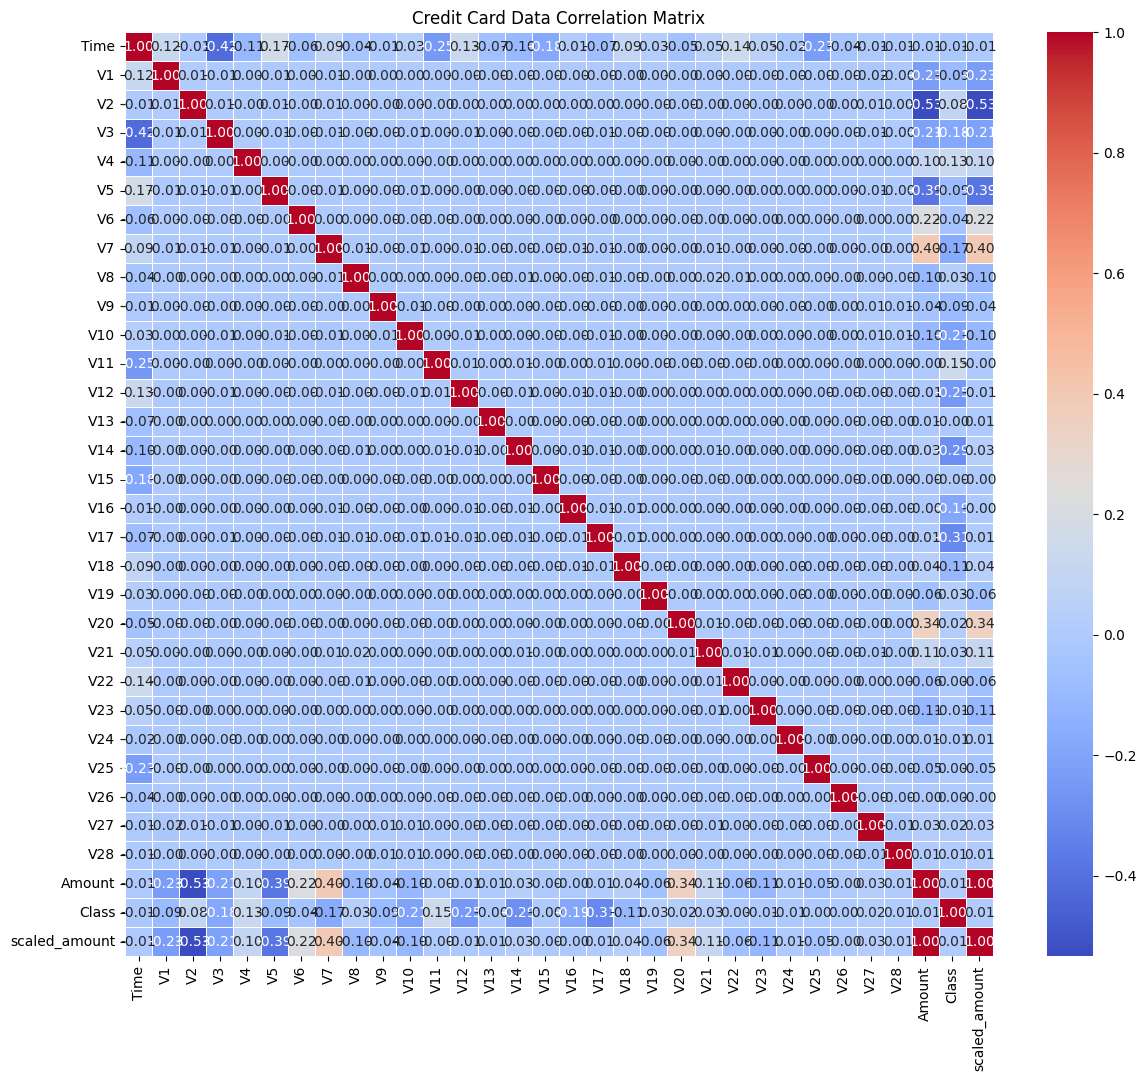

In [19]:
eda.plot_correlations()           

In [20]:
eda.map_ip_addresses()            


In [21]:
eda.save_processed_data()  

### 3.Feature Engineering:Fraud_Dataset

#### Initialize future engineering 

In [22]:
output_path = r"E:\DS+ML\AIM3\WEEK.12\Data"

fraud_data = pd.read_csv(output_path+"/processed_fraud_data.csv")

# Initialize the feature engineer with the fraud dataset
feature_engineer = FraudFeatureEngineer(fraud_data)

# Perform feature engineering
processed_data = feature_engineer.process()

# Save the processed data to the output path
processed_data.to_csv(output_path + "/featured_fraud_data.csv", index=False)

2025-03-07 19:47:25,236 - FraudFeatureEngineer - INFO - Initializing FraudFeatureEngineer with data shape: (151112, 14)
2025-03-07 19:47:25,332 - FraudFeatureEngineer - WARNING - Input data contains missing values. Proceed with caution.
2025-03-07 19:47:25,334 - FraudFeatureEngineer - INFO - Starting full feature engineering pipeline...
2025-03-07 19:47:25,335 - FraudFeatureEngineer - INFO - Adding transaction frequency and velocity features...
2025-03-07 19:47:26,077 - FraudFeatureEngineer - INFO - Successfully added transaction frequency and velocity features.
2025-03-07 19:47:26,079 - FraudFeatureEngineer - INFO - Adding time-based features...
2025-03-07 19:47:26,143 - FraudFeatureEngineer - INFO - Successfully added time-based features.
2025-03-07 19:47:26,145 - FraudFeatureEngineer - INFO - Normalizing numerical features: ['purchase_value', 'age', 'transaction_frequency', 'transaction_velocity']
2025-03-07 19:47:26,184 - FraudFeatureEngineer - INFO - Fitted StandardScaler and norm

### 3. Feature Engineering Credit Card 

In [ ]:
import os
output_path = r"E:\DS+ML\AIM3\WEEK.12\Data"
credit_data = pd.read_csv(os.path.join(output_path, "cleaned_credit.csv"))  # Fixed path
# Initialize the feature engineer
feature_engineer = FeatureCredit(credit_data, output_path)
# Perform feature engineering
processed_data = feature_engineer.process()
# Access the processed data
print(processed_data.head())

2025-03-07 19:56:41,883 - FeatureCredit - INFO - Starting feature engineering pipeline...
2025-03-07 19:56:42,647 - FeatureCredit - INFO - Scaling 'Amount' feature...
2025-03-07 19:56:46,450 - FeatureCredit - INFO - 'Amount' scaled successfully.
2025-03-07 19:56:46,450 - FeatureCredit - INFO - Creating time-based features...
2025-03-07 19:56:47,442 - FeatureCredit - INFO - Time-based features created successfully.
2025-03-07 19:57:06,258 - FeatureCredit - INFO - Data saved to E:\DS+ML\AIM3\WEEK.12\Data\featured_credit_data.csv
2025-03-07 19:57:06,263 - FeatureCredit - INFO - Pipeline completed successfully.


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V25       V26       V27       V28  Amount  \
0  0.098698  0.363787  ...  0.128539 -0.189115  0.133558 -0.021053  149.62   
1  0.085102 -0.255425  ...  0.167170  0.125895 -0.008983  0.014724    2.69   
2  0.247676 -1.514654  ... -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3  0.377436 -1.387024  ...  0.647376 -0.221929  0.062723  0.061458  123.50   
4 -0.270533  0.817739  ... -0.206010  0.502292  0.219422  0.215153   69.99   

   Class  scaled_amount  time_hour  day_of_w